# Nueve reinas.
### Autor: Saúl Sosa Díaz



---
## El Problema.

  



In [1]:
using JuMP, GLPK

function solve_nqueens(n)
    model = Model(GLPK.Optimizer)
    
    # Variables de decisión
    @variable(model, x[1:n, 1:n], Bin)
    
    # Restricciones de fila y columna
    for i in 1:n
        @constraint(model, sum(x[i, j] for j in 1:n) == 1)  # Una reina por fila
        @constraint(model, sum(x[j, i] for j in 1:n) == 1)  # Una reina por columna
    end
    
    # Restricciones de diagonales
    for i in 1:n
        for j in 1:n
            # Diagonal principal superior derecha
            @constraint(model, sum(x[k, l] for k in 1:n, l in 1:n if k-l == i-j) <= 1)
            # Diagonal principal inferior izquierda
            @constraint(model, sum(x[k, l] for k in 1:n, l in 1:n if k+l == i+j) <= 1)
        end
    end
    
    # Resuelve el modelo
    optimize!(model)
    
    # Imprime la solución
    solution = zeros(Int, n, n)
    for i in 1:n
        for j in 1:n
            solution[i, j] = value(x[i, j])
        end
    end
    
    return solution
end

n = 9
result = solve_nqueens(n)

println(result)
result

[0 0 1 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 1; 0 0 0 0 0 1 0 0 0; 0 1 0 0 0 0 0 0 0; 0 0 0 0 1 0 0 0 0; 0 0 0 0 0 0 1 0 0; 1 0 0 0 0 0 0 0 0; 0 0 0 1 0 0 0 0 0; 0 0 0 0 0 0 0 1 0]


9×9 Matrix{Int64}:
 0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1
 0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  1  0

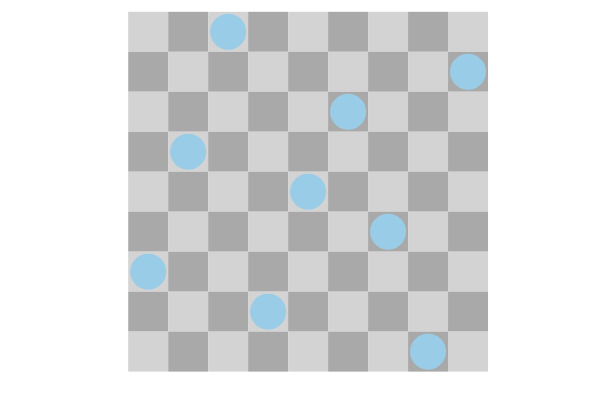

In [19]:
using Plots

function plot_nqueens(solution)
    n = size(solution, 1)
    p = plot(; 
            legend=false, 
            ratio=1, 
            xlims=(0, n), 
            ylims=(0, n), 
            xticks=1:n, 
            yticks=1:n, 
            border=:none,   
            background_color_inside=:transparent, 
            background_color_outside=:transparent, 
            grid=false
            )
    
    # Draw the board
    for i in 1:n
        for j in 1:n
            if (i + j) % 2 == 0
                plot!([j-1, j, j, j-1, j-1], [n-i, n-i, n-i+1, n-i+1, n-i], fill=(0, :lightgray), linealpha=0)
            else
                plot!([j-1, j, j, j-1, j-1], [n-i, n-i, n-i+1, n-i+1, n-i], fill=(0, :darkgray), linealpha=0)
            end
        end
    end

    pastel_blue = RGB(0.6, 0.8, 0.9)
    # Place the queens
    for i in 1:n
        for j in 1:n
            if solution[i, j] == 1
                scatter!([j-0.5], [n-i+0.5], markercolor=pastel_blue, markershape=:circle, markerstrokewidth=0, markersize=20, label=false)
            end
        end
    end
    
    return p
end



plot_nqueens(result)

## Problema Tridimensional Planar
### Supuesto.
Un día, el gerente de la empresa "Canarias Limpia" visitó nuestras instalaciones con una inquietud: se habían presentado problemas de índole personal que habían dejado obsoletos todos los horarios de trabajo. Se acercó a nosotros en busca de asistencia para la elaboración de los nuevos horarios de trabajo.

Durante la reunión, nos proporcionó valiosa información acerca de su empresa, que se dedica a la limpieza de plantas industriales pertenecientes a otras compañías. En particular, nos suministró los siguientes datos relevantes:

* El número de clientes atendidos.
* La cantidad de empleados actualmente en plantilla.
* La cantidad de máquinas necesarias para llevar a cabo las labores de limpieza.
* El costo económico asociado al traslado de una máquina por parte de un empleado hacia las instalaciones del cliente con el fin de realizar la limpieza.

Por tanto lo que tenemos es:
* Conjunto de clientes que llamaremos $C = \{1,\ldots,n\}$.
* Conjunto de empleados que llamaremos $E = \{1,\ldots,m\}$.
* Conjunto de máquinas que llamaremos $M = \{1,\ldots,h\}$.
* costo económico asociado al traslado de una máquina por parte de un empleado hacia las instalaciones del cliente con el fin de realizar la limpieza, que denotaremos como $Coste_{cem}$. Donde cada posición indicará el coste de llevar la máquina $m$ por el empleado $e$ al cliente $c$. $\forall c ∈ C \land \forall e ∈ E \land \forall m ∈ M$

### Modelo
#### Variables.
$X_{ijk} = \begin{dcases}
   1 &\text{Si la máquina } m \text{ es llevada por el empleado } e \text{ al cliente } c. \text{ }\forall c ∈ C \land \forall e ∈ E \land \forall m ∈ M\\
   0 &\text{Otro caso}
\end{dcases}$
#### Función Objetivo.
$$
\begin{array}{ccc}
max \sum_{c∈C}\sum_{e∈E}\sum_{m∈M} Coste_{cem} * X_{cem}& \\&  
\end{array}
$$
#### Restricciones.
$$
\begin{array}{ccc}
&  \sum_{c∈C}\sum_{e∈E} X_{cem} = 1 & \forall m \in M \\
&  \sum_{e∈E}\sum_{m∈M} X_{cem} = 1 & \forall c \in C \\
&  \sum_{c∈C}\sum_{m∈M} X_{cem} = 1 & \forall e \in E \\
&  X_{cem} \in \{0,1\} &\forall c ∈ C \land \forall e ∈ E \land \forall m ∈ M\\
\end{array}
$$


### Resolvemos el modelo.

#### Importamos las librerías necesarias.

In [3]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")

using JuMP, GLPK, Random


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


#### Introducimos los datos.

In [4]:
C = 4         # número de clientes
E = C         # número de empleados
M = E        # número de máquinas
Random.seed!(1234)
Coste = rand(20:60, C, E, M) # coste de asignar un empleado a una máquina para llevar a un cliente

4×4×4 Array{Int64, 3}:
[:, :, 1] =
 33  34  40  20
 42  36  50  28
 28  59  43  38
 56  52  49  47

[:, :, 2] =
 59  24  45  47
 46  40  29  51
 60  43  25  44
 50  30  45  35

[:, :, 3] =
 25  43  54  42
 58  22  34  32
 43  48  51  29
 47  23  31  60

[:, :, 4] =
 54  41  60  35
 48  58  40  43
 38  53  49  27
 56  39  27  33

#### Definimos el modelo.

In [5]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:C,1:E,1:M] >= 0, binary=true)
# Definir función objetivo
@objective(model, Min, sum(Coste[c,e,m] * x[c,e,m] for c in 1:C, e in 1:E, m in 1:M))

@constraint(model, p[m=1:M] , sum(x[:,:,m]) == 1 ) # Cada máquina solo puede ir con un empleado a un cliente.
@constraint(model, h[c=1:C] , sum(x[c,:,:]) == 1 ) # Un cliente solo puede ser atendido por un empleado y una máquina.
@constraint(model, f[e=1:E] , sum(x[:,e,:]) == 1 ) # Un empleado solo puede llevar una máquina a un cliente.


4-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 f[1] : x[1,1,1] + x[2,1,1] + x[3,1,1] + x[4,1,1] + x[1,1,2] + x[2,1,2] + x[3,1,2] + x[4,1,2] + x[1,1,3] + x[2,1,3] + x[3,1,3] + x[4,1,3] + x[1,1,4] + x[2,1,4] + x[3,1,4] + x[4,1,4] = 1
 f[2] : x[1,2,1] + x[2,2,1] + x[3,2,1] + x[4,2,1] + x[1,2,2] + x[2,2,2] + x[3,2,2] + x[4,2,2] + x[1,2,3] + x[2,2,3] + x[3,2,3] + x[4,2,3] + x[1,2,4] + x[2,2,4] + x[3,2,4] + x[4,2,4] = 1
 f[3] : x[1,3,1] + x[2,3,1] + x[3,3,1] + x[4,3,1] + x[1,3,2] + x[2,3,2] + x[3,3,2] + x[4,3,2] + x[1,3,3] + x[2,3,3] + x[3,3,3] + x[4,3,3] + x[1,3,4] + x[2,3,4] + x[3,3,4] + x[4,3,4] = 1
 f[4] : x[1,4,1] + x[2,4,1] + x[3,4,1] + x[4,4,1] + x[1,4,2] + x[2,4,2] + x[3,4,2] + x[4,4,2] + x[1,4,3] + x[2,4,3] + x[3,4,3] + x[4,4,3] + x[1,4,4] + x[2,4,4] + x[3,4,4] + x[4,4,4] = 1

#### Resolvemos el modelo.

In [6]:
optimize!(model)

#### Mostramos el resultado.

In [7]:
objetive = objective_value(model)
println("Coste total: ", objetive , "€.")
println()
for c in 1:C  
    for e in 1:E
        for m in 1:M
            if value(x[c,e,m]) > 0
                println("El empleado $e lleva la máquina $m al cliente $c. Con un coste de ", Coste[c,e,m], "€.")
            end
        end
    end
end

Coste total: 110.0€.

El empleado 4 lleva la máquina 1 al cliente 1. Con un coste de 20€.
El empleado 3 lleva la máquina 2 al cliente 2. Con un coste de 29€.
El empleado 1 lleva la máquina 4 al cliente 3. Con un coste de 38€.
El empleado 2 lleva la máquina 3 al cliente 4. Con un coste de 23€.


## Problema Tridimensional Axial
### Supuesto.
Un día, el dueño del supermercado _El Sauzal Comercia_ visitó nuestra oficina con un problema: sus clientes estaban dejando de visitar su supermercado. Después de realizar varias encuestas a sus antiguos clientes, llegó a la conclusión de que los productos estaban mal ubicados en las estanterías de la tienda. Por lo tanto, les preguntó a sus clientes dónde preferirían que estuviera cada artículo, es decir, en qué estantería y nivel de la estantería del supermercado.

Con esa información, realizó y brindo un mapa del supermercado con toda la información de las estanterías del establecimiento.
* Número de niveles de las estanterías todas las estanterías tienen el mismo número de niveles.
* Capacidad de los niveles de cada estantería.
* Satisfacción de los clientes al encontrar cada artículo en niveles de estanterías específicas.

Por tanto lo que tenemos es:
* Conjunto de estanterías que llamaremos $E = \{1,\ldots,n\}$.
* Conjunto de niveles que llamaremos $N = \{1,\ldots,m\}$.
* Conjunto de artículos que llamaremos $K = \{1,\ldots,h\}$.
* Capacidad de cada nivel de cada estantería. la cual llamaremos $C_{en}$. Donde cada posición indicará la capacidad máxima del nivel $n$ de la estantería $e$. $\forall e ∈ E \land \forall n ∈ N$
* Satisfaccion de todos los artículos en todos los niveles de todas las estanterías, que denotaremos como $S_{enk}$. Donde cada posición indicará la media de satifacción de los clientes de encontrar el producto $k$ en el nivel $n$ de la estantería $e$. $\forall e ∈ E \land \forall n ∈ N \land \forall k ∈ K$

Además, nos aportó restricciones adicionales:
* Es necesario que todos los productos estén ubicados en algún lugar dentro del supermercado.
* La colocación de una cantidad de artículos superior a la capacidad de un solo nivel de una estantería resulta imposible.
* Cada nivel de todas las estanterías cuente con al menos un producto.

### Modelo
#### Variables.
$X_{ijk} = \begin{dcases}
   1 &\text{Si el artículo } k \text{ se coloca en el nivel } n \text{ de la estantería } e. \text{ }\forall e ∈ E \land \forall n ∈ N \land \forall k ∈ K\\
   0 &\text{Otro caso}
\end{dcases}$
#### Función Objetivo.
$$
\begin{array}{ccc}
max \sum_{e∈E}\sum_{n∈N}\sum_{k∈K} S_{enk} * X_{enk}& \\&  
\end{array}
$$
#### Restricciones.
$$
\begin{array}{ccc}
&  \sum_{e∈E}\sum_{n∈N} X_{enk} = 1 & \forall k \in K & \text{Cada producto tiene que estar en alguna parte del supermercado.} \\& 
\sum_{k∈K} X_{enk} \geq 1 & \forall e ∈ E \land \forall n ∈ N & \text{Cada nivel de cada estantería tiene al menos un artículo.} \\& 
\sum_{k∈K} X_{enk} \leq C_{en} & \forall e ∈ E \land \forall n ∈ N & \text{Los productos no deben exceder la capacidad de los niveles de las estanterías.} \\& 
X_{enk} \in \{0,1\} &\forall e ∈ E \land \forall n ∈ N \land \forall k ∈ K\\
\end{array}
$$


### Resolución del problema.
Importamos los paquetes necesarios.

#### Introducimos los datos.

In [8]:
E = 3         # número de estanterías
N = 5         # número de niveles
K = 18    # numero de artículos
Random.seed!(1234)
S = rand(1:10, E, N, K)
C = rand(1:2, E, N) # capacidad de cada estantería y nivel


3×5 Matrix{Int64}:
 1  1  1  1  1
 1  1  2  2  2
 2  2  1  1  2

In [9]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:E,1:N,1:K] >= 0, binary=true)

# Definir función objetivo
@objective(model, Max, sum(S[e,n,k] * x[e,n,k] for e in 1:E, n in 1:N, k in 1:K))

@constraint(model, p[k=1:K] , sum(x[:,:,k]) == 1 ) # Cada producto está asociado a una estantería y nivel.
@constraint(model, c[e=1:E,n=1:N] , sum(x[e,n,:]) >= 1 ) # Cada nivel de cada estantería tiene al menos un producto.
@constraint(model, h[e=1:E,n=1:N] , sum(x[e,n,:]) <= C[e,n] ) # Cada estantería y nivel tiene como mucho de su capacidad total.



3×5 Matrix{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}}:
 h[1,1] : x[1,1,1] + x[1,1,2] + x[1,1,3] + x[1,1,4] + x[1,1,5] + x[1,1,6] + x[1,1,7] + x[1,1,8] + x[1,1,9] + x[1,1,10] + x[1,1,11] + x[1,1,12] + x[1,1,13] + x[1,1,14] + x[1,1,15] + x[1,1,16] + x[1,1,17] + x[1,1,18] ≤ 1  …  h[1,5] : x[1,5,1] + x[1,5,2] + x[1,5,3] + x[1,5,4] + x[1,5,5] + x[1,5,6] + x[1,5,7] + x[1,5,8] + x[1,5,9] + x[1,5,10] + x[1,5,11] + x[1,5,12] + x[1,5,13] + x[1,5,14] + x[1,5,15] + x[1,5,16] + x[1,5,17] + x[1,5,18] ≤ 1
 h[2,1] : x[2,1,1] + x[2,1,2] + x[2,1,3] + x[2,1,4] + x[2,1,5] + x[2,1,6] + x[2,1,7] + x[2,1,8] + x[2,1,9] + x[2,1,10] + x[2,1,11] + x[2,1,12] + x[2,1,13] + x[2,1,14] + x[2,1,15] + x[2,1,16] + x[2,1,17] + x[2,1,18] ≤ 1     h[2,5] : x[2,5,1] + x[2,5,2] + x[2,5,3] + x[2,5,4] + x[2,5,5] + x[2,5,6] + x[2,5,7] + x[2,5,8] + x[2,5,9] + x[2,5,10] + x[2,5,11] + x[2,5,12] + x[2,5,13] + x[2,5,14] + x[2

#### Resolvemos el modelo.

In [10]:
optimize!(model)

#### Mostramos la solución óptima.

In [11]:
objetive = objective_value(model)
println("Satisfacción máxima de los clientes: ", objetive)
println()
println("Estanterías:")
for e in 1:E  
    println("  Estantería $e")
    for n in 1:N
        Ce_n = C[e,n]
        println("    Nivel $n con capacidad para $Ce_n artículos. Contiene los artículos:")
        uno = false
        for k in 1:K
            if value(x[e,n,k]) > 0
                uno = true
                println("      * artículo $k")
            end
        end
    end
    println()
end

Satisfacción máxima de los clientes: 172.0

Estanterías:
  Estantería 1
    Nivel 1 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 6
    Nivel 2 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 3
    Nivel 3 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 1
    Nivel 4 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 7
    Nivel 5 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 5

  Estantería 2
    Nivel 1 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 2
    Nivel 2 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 14
    Nivel 3 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 12
    Nivel 4 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 8
      * artículo 18
    Nivel 5 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 10

  Estantería 3
   